<a href="https://colab.research.google.com/github/aliabbas70/MNIST_Digit_Classification/blob/main/MNISTdigitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#loading the mnsit data from keras

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,X_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000, 28, 28)


In [ ]:
#Image dimension 28*28

5


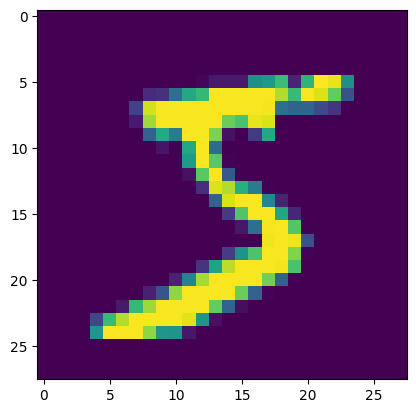

In [ ]:
plt.imshow(X_train[0])
print(Y_train[0])

In [ ]:
#image labels

In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#setting the layers of the neural networkss
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8490 - loss: 0.5151
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9538 - loss: 0.1507
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9674 - loss: 0.1096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0549
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0397
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0349
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9900 - loss: 0.0323


In [ ]:
# #training data accuracy is 99%
# now accuracy on test dtaa
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1422
0.9649999737739563


In [ ]:
#test data accuracy = 97%

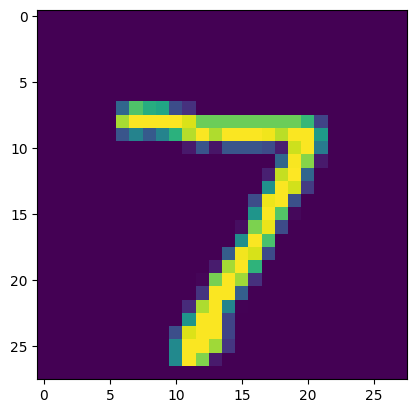

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred[0])

[9.2392683e-04 4.0982515e-03 1.9052122e-02 7.5142556e-01 1.7360574e-07
 2.9200710e-02 4.1677276e-10 9.9999964e-01 2.4163209e-02 1.5615270e-01]


In [ ]:
#model.preict give the prediction probability for each class for that data point

In [ ]:
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the predicitons probabilities to class label for all test data points

In [ ]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

confusion matrix


In [ ]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 954    1    1    1    4    3    7    1    1    7]
 [   0 1114    1    5    0    1    6    1    7    0]
 [   6    2  964   19   14    1    7    8   11    0]
 [   0    0    2  985    1   10    0    5    1    6]
 [   0    0    1    1  966    1    3    0    1    9]
 [   1    0    0   20    3  854    6    1    6    1]
 [   3    2    1    1    7    6  937    0    1    0]
 [   1    3    1    7    4    1    1  986    2   22]
 [   0    1    3   22    3    6    6    4  916   13]
 [   0    3    1    5   19    3    0    2    2  974]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

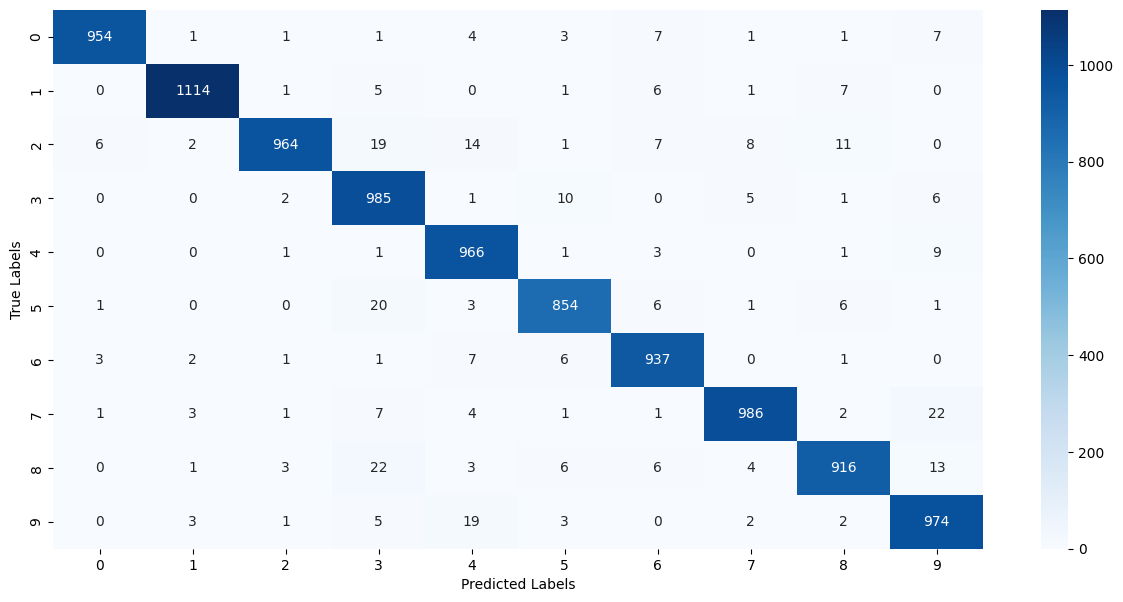

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
#building a predictive system

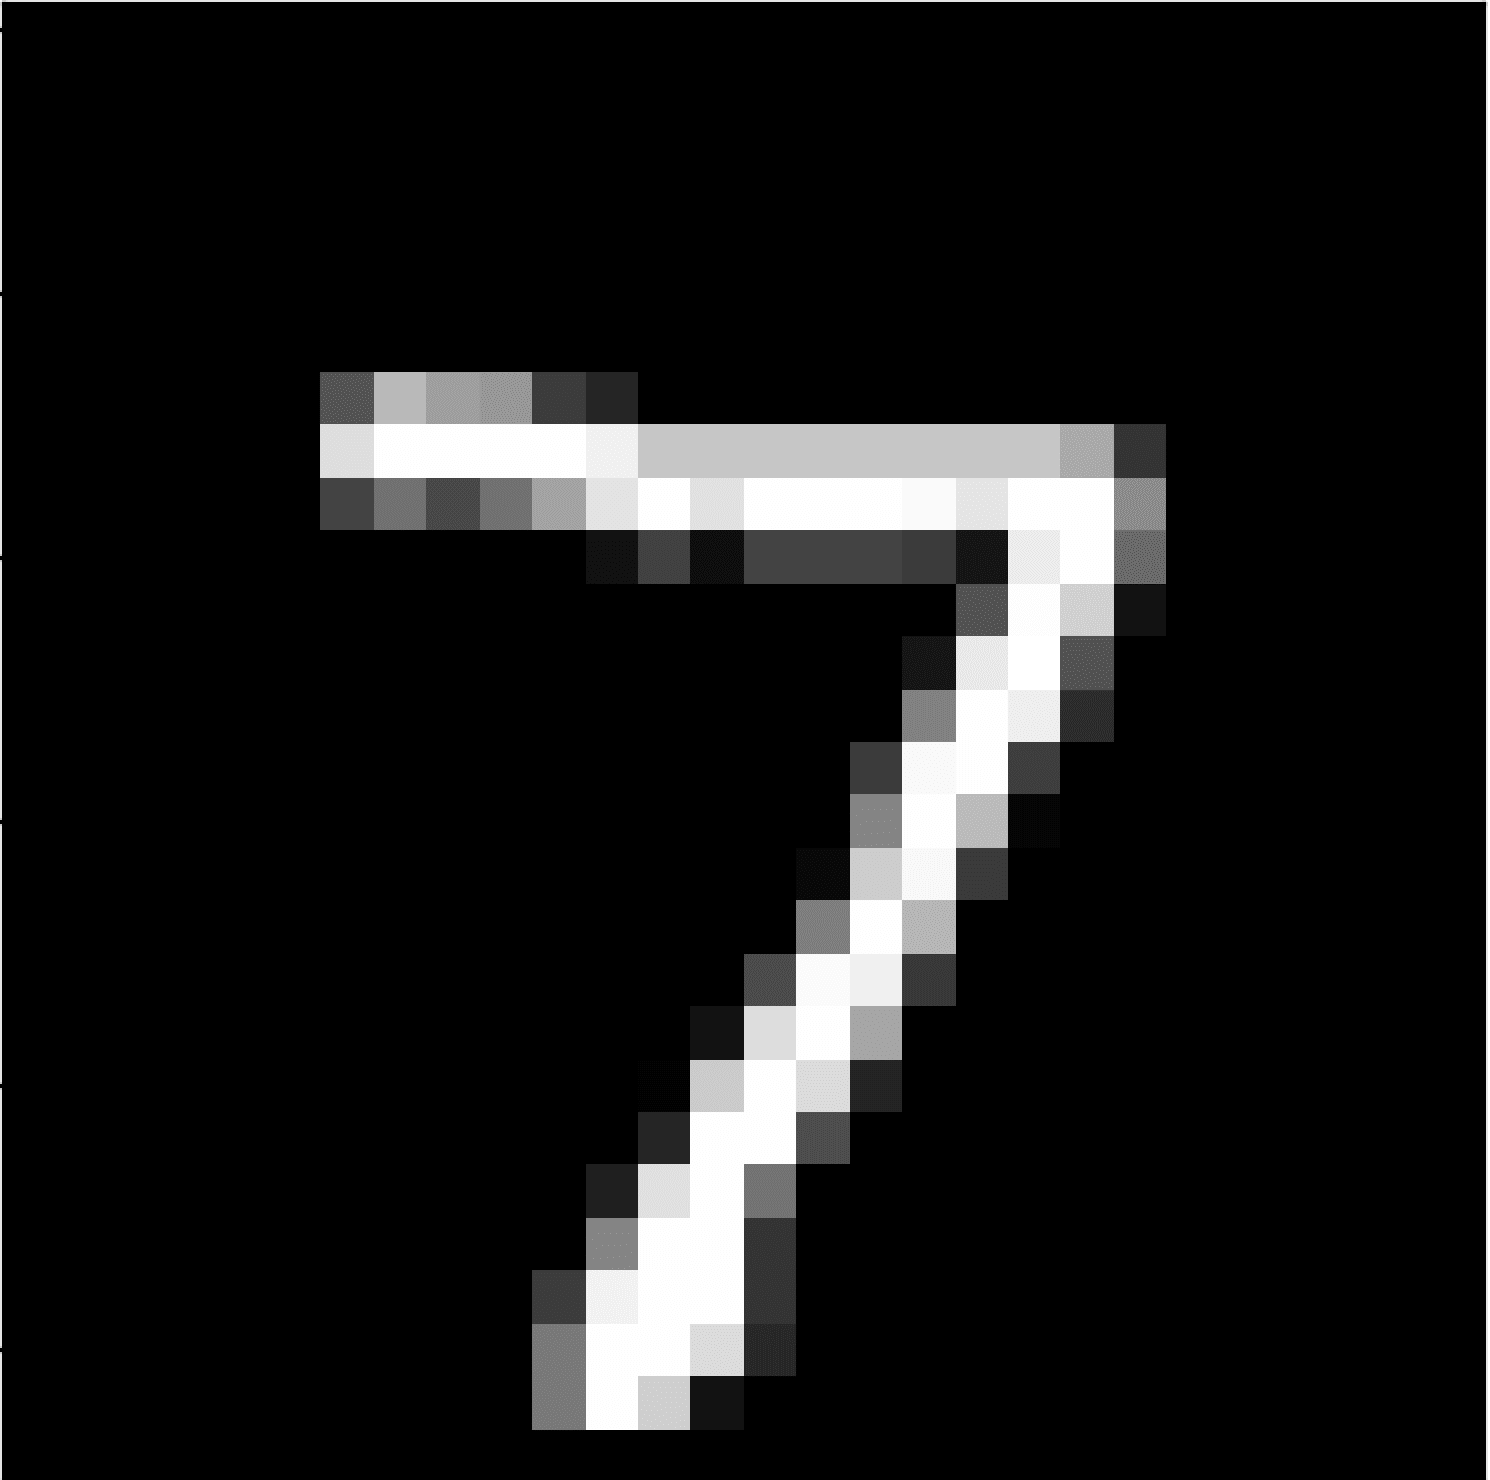

In [ ]:
input_image_path='/content/digit.png'
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
input_image.shape

(1480, 1490, 3)

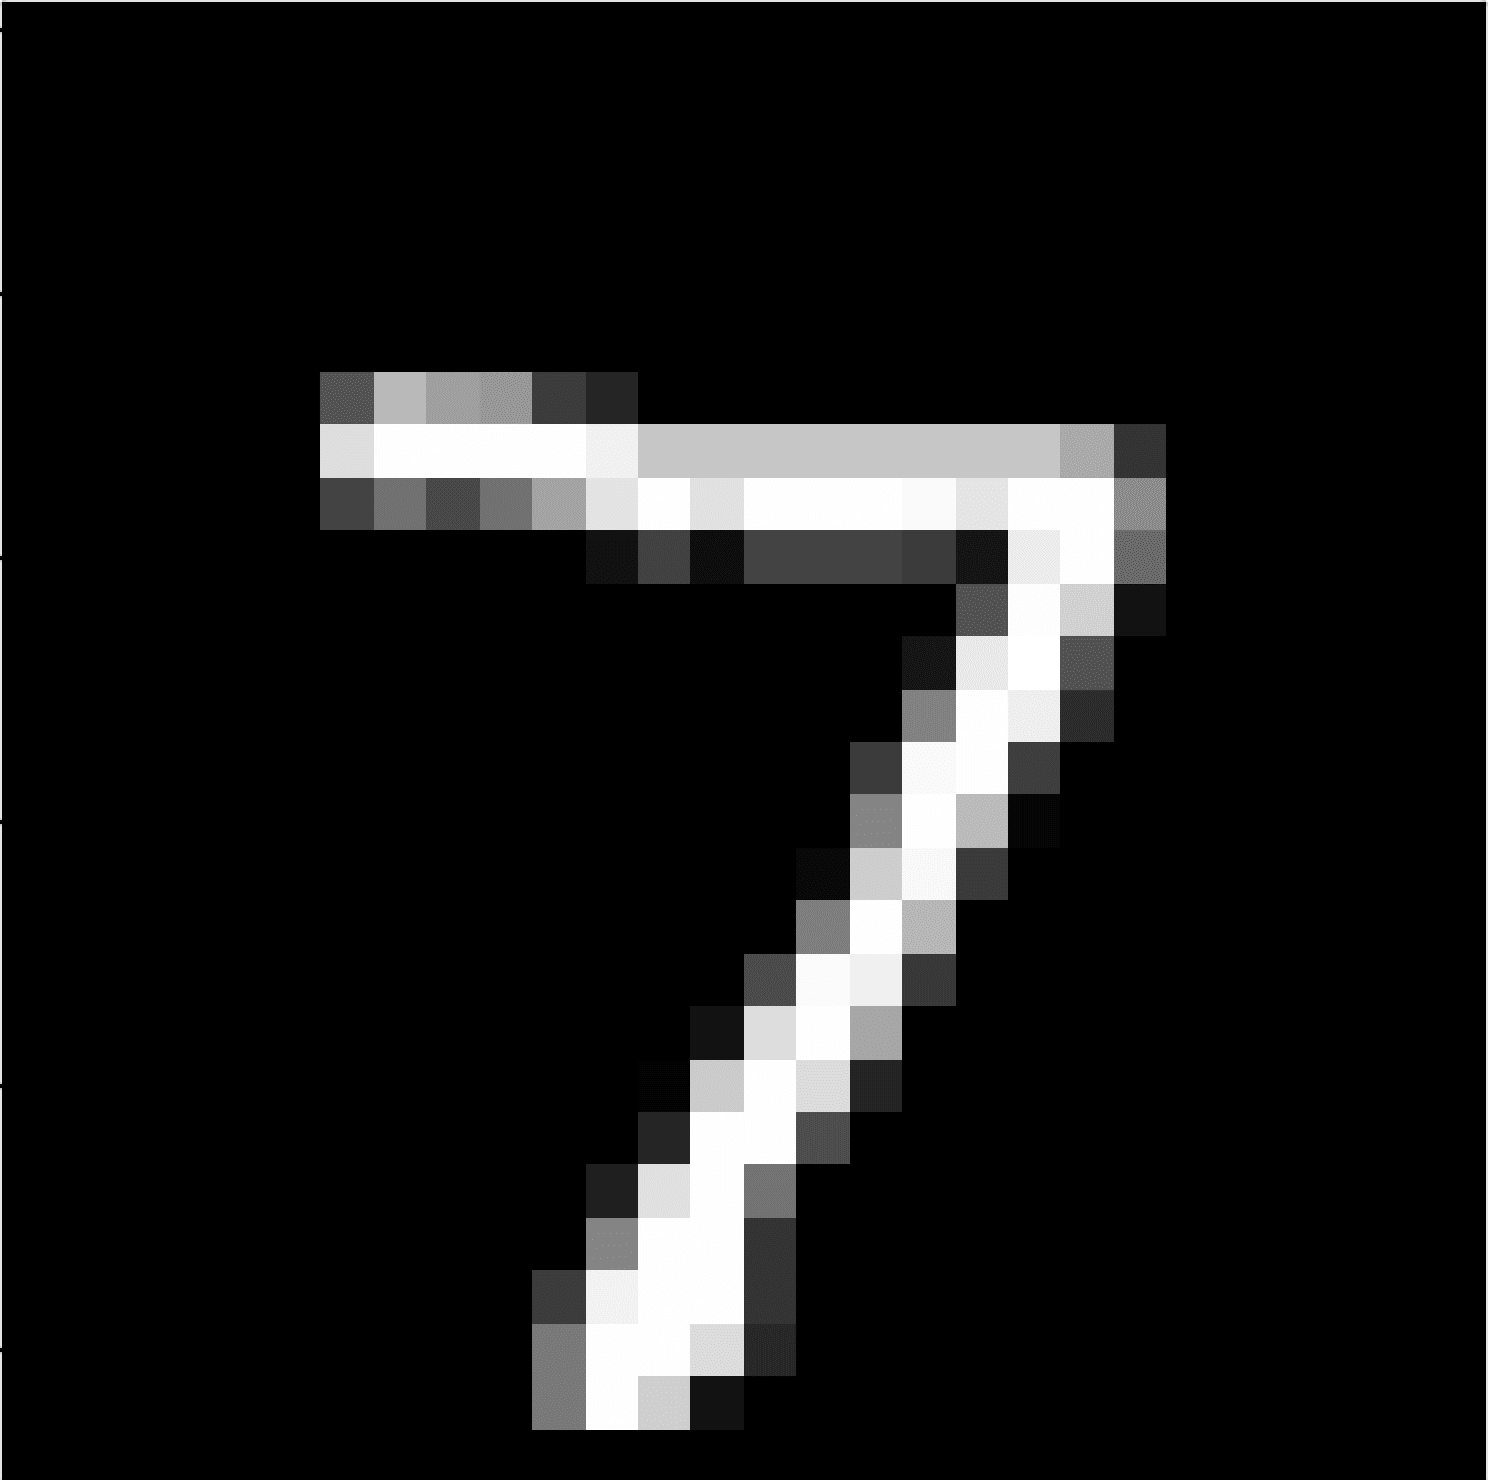

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
image_reshaped.shape

(1, 28, 28)

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[8.9114410e-04 4.0812781e-03 1.9466789e-02 7.5249910e-01 1.7470524e-07
  2.9783342e-02 4.1452675e-10 9.9999964e-01 2.4057847e-02 1.5112115e-01]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

7


In [ ]:
#predictive system

enter the file path of the image to be predicted/content/digit.png


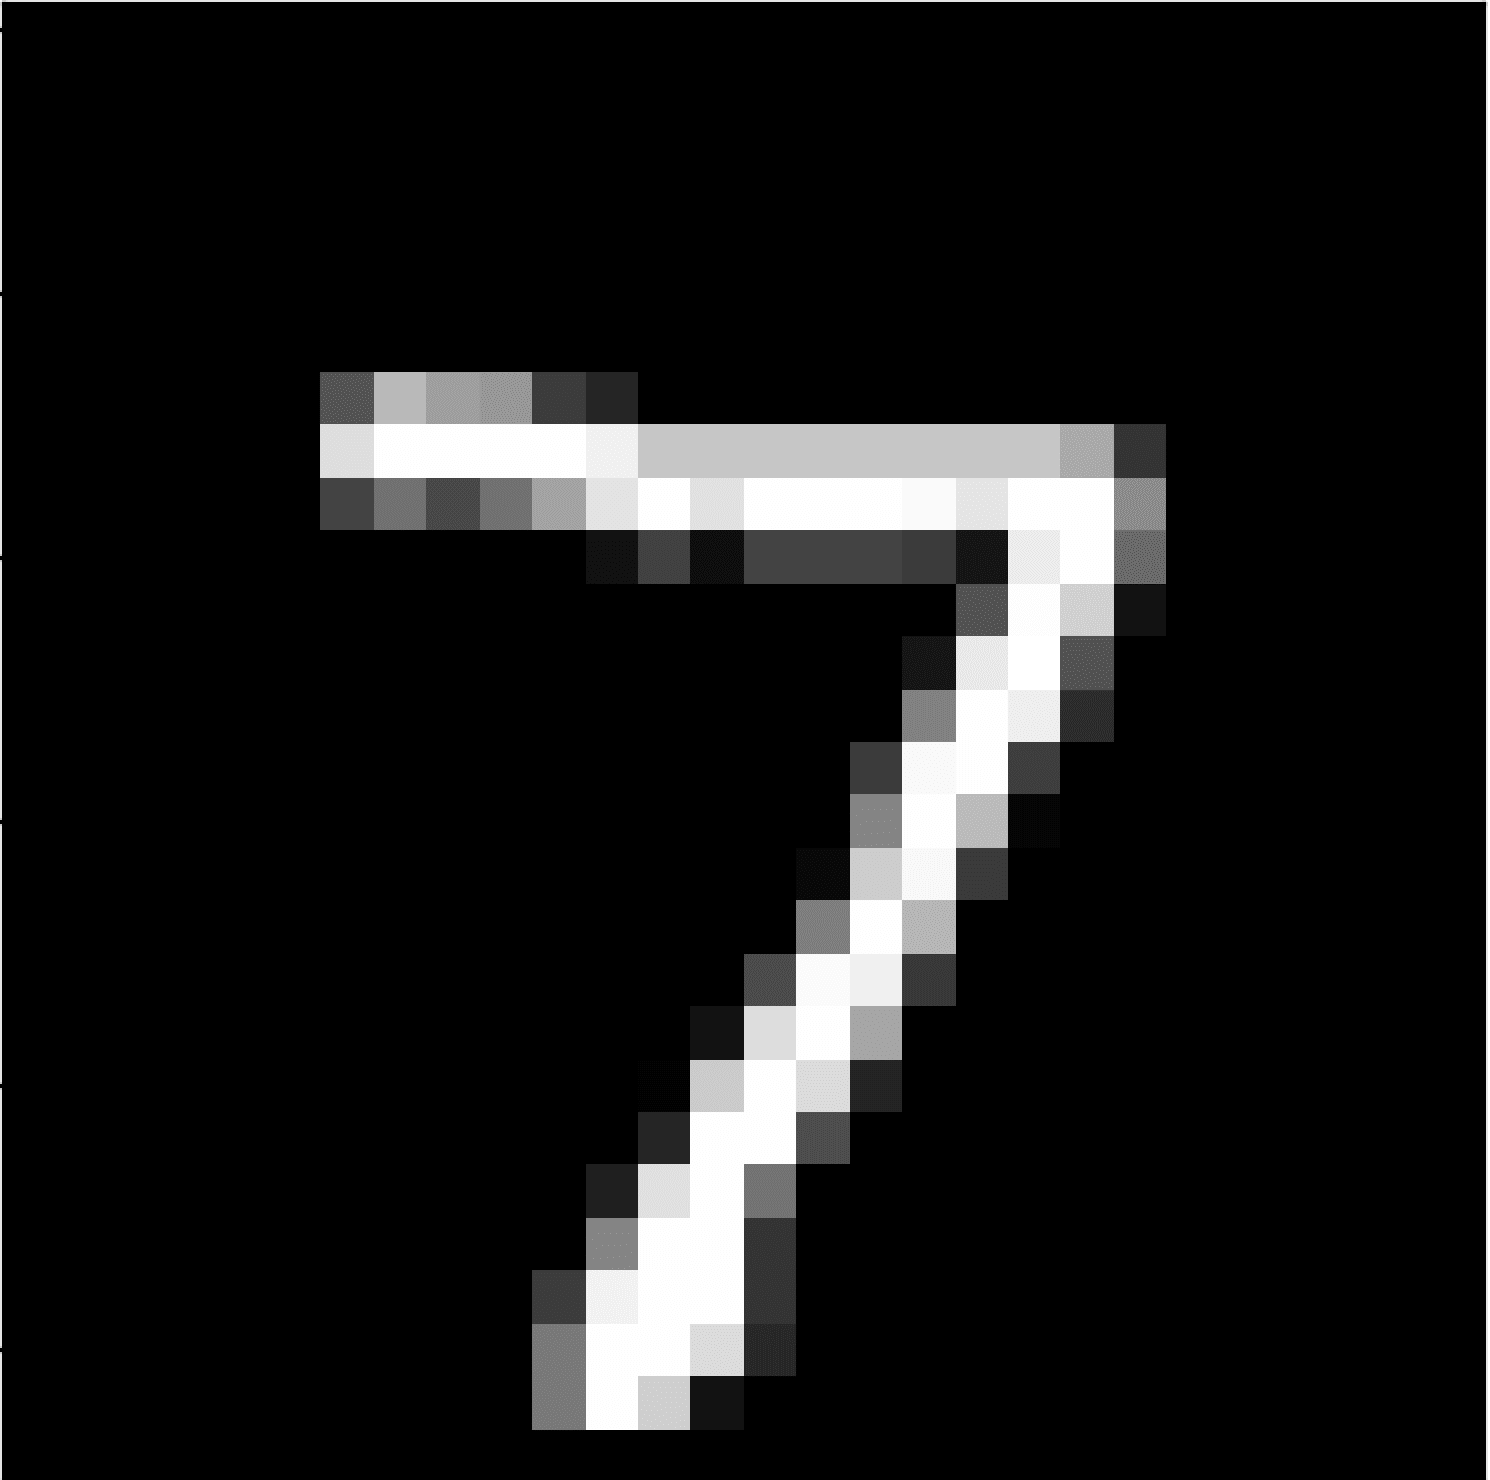

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
the Handwritten digit recognized as  7


In [ ]:
input_file_path=input('enter the file path of the image to be predicted')
input_image=cv2.imread(input_file_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print("the Handwritten digit recognized as ",input_pred_label)